# Pytesseract Orientation and Script Detection (OSD) Example

This example shows how to use the orientation and script detection (OSD) functions in pytesseract.

OSD, plainly, describes the detection of the orientation of the input image and apparent script (alphabet). This information is extremely useful when you want to improve accuracy with Tesseract/pytesseract, which will be demonstrated in the examples below.

In [1]:
from PIL import Image
import pytesseract

## Image Rotation

If the input image is rotated, then Tesseract will by default give bad results. Tesseract by default, does not apply any preprocessing to rotate images - it is up to the end-user to rotate before processing. 

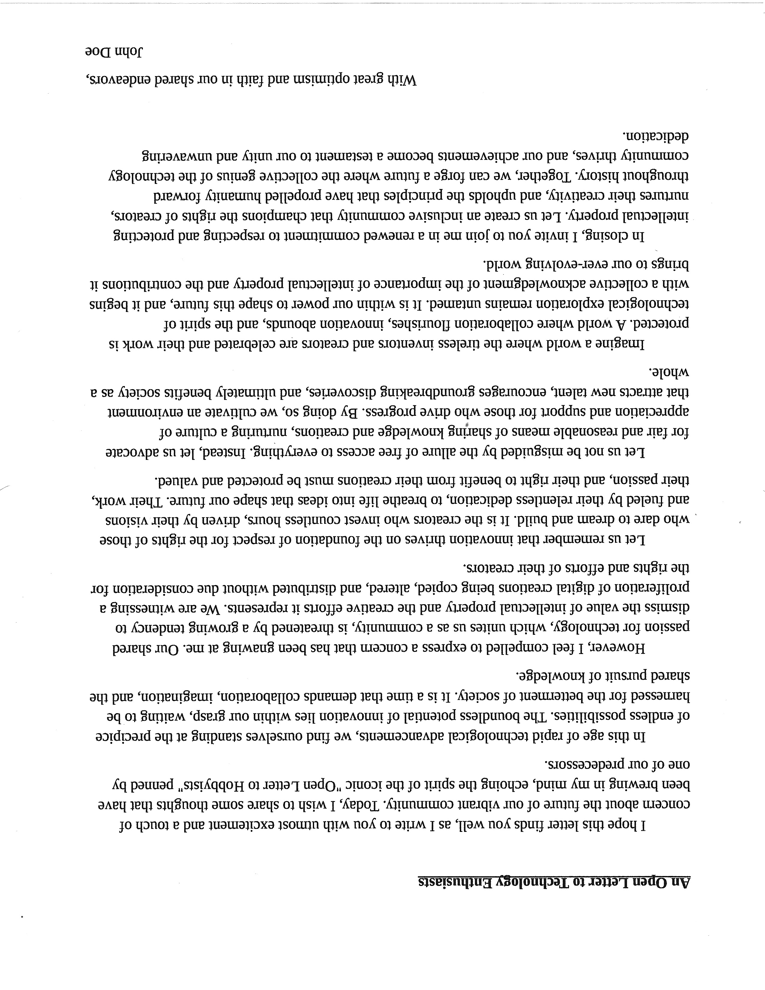

In [2]:
path = '../../../../binder-datasets/ocr/images/letter_rotated.jpg'
im = Image.open(path)
display(im.resize(int(0.3*s) for s in im.size))

Let's see the results as-is.

In [3]:
print(pytesseract.image_to_string(im))

a0q uyor

‘sIOARapUs pareys INO Ul yey pue wistumdo years WIM

“WOTRDIpap
SULIdARMUN pue AIIUN IMO 0} JUSUTe}Sa} B aUIOIAG SJUBWIBATTYIe MO pue ‘saaty) ATUNUIUIOD
AZoTouya} sup Jo sntuas BANaT[Od ay} aayM aININJ e 9810] UD aM “TayIasOL, ALO}sTY Noysnop
premio} Auewmy petjedoid aaey yew) sopdioutid ay) sproydn pue ‘AtAyeaso ey) saminu
‘s10}ea19 JO SUSU ayy suotdureyo yey) ATUNUIUIOD BATSNPUT Ue a}eaID sn jay ‘Ayadod [enDaTjaIut
sundaloid pue 8undadsai 0} JUBUNTUIWIOD paMmaual e UT aut uTOf 0} NOA aHAUT | “BUTSOTD UT

‘PLIOM SUTATOAS-~IaAa INO 0} SBULIQ
}f SUOTMNGLNUOD au) pue Ayadord JempdaTjaIUT Jo aUEIOdUTT ay} Jo WAWISpay|MOUye aATOaTIOD & YIM
suIgaq I pue ‘amyny sip adeys 0} JaMmod IMO UTYIIM ST I] ‘pauiejuN suTeUeI UOMeIOTAxe [eoTso;oUTya)
Jo Ids at pue ‘spunoge UOTRAOUUT ‘SaysLMOT] WONeIOGeT[OD a1ayM PLOM VY ‘peye101d

SI YIOM ITay}] PU PaleIqaTad are s1O}ea1D PUL SIOJUIAUT SSafaIN af} aoyM P]JOM e sUTSeUIT

‘ajoum
e se AjaIN0s s}ljauiaq ATAIEUIN[N pue ‘saLaAooSIp SUTYeIIQpUNOIS s

The text is completely inaccurate. You can see what Tesseract was trying to do, read it top-to-bottom and extract the text.

## Orientation and Script Detection (OSD)

OSD can help us here by providing necessary information to fix not only the rotation issue, but it also provides addition information such as the script language.

We can get OSD information with pytesseract by using ```image_to_osd```.

It provides this information:

* **page_num** the page index of the current item
* **orientation** the detected rotation of the image
* **rotate** the *required* rotation angle to get the text in a horizontal format
* **orientation_conf** the confience of Tesseract that the orientation was detected correctly - higher is better
* **script**  provides information about the language or script family to which the detected text belongs
* **script_conf** the confience of Tesseract that the script was detected correctly - higher is better

[According to the official documentation](https://tesseract-ocr.github.io/tessapi/5.x/a02438.html#aca4e9a0d9cf388510168d9b58864d1e5) a score of confience score 15.0 is 'reasonably confident' for orientation and script detection.

It is very helpful to use the ```output_type``` of ```dict```, so we can easily access the values with the given keys.

In [4]:
osd = pytesseract.image_to_osd(im, output_type='dict')
print(osd)

{'page_num': 0, 'orientation': 180, 'rotate': 180, 'orientation_conf': 20.69, 'script': 'Latin', 'script_conf': 33.33}


## Correcting the rotation

Let's correct the rotation. It is easy using ```Pillow```.

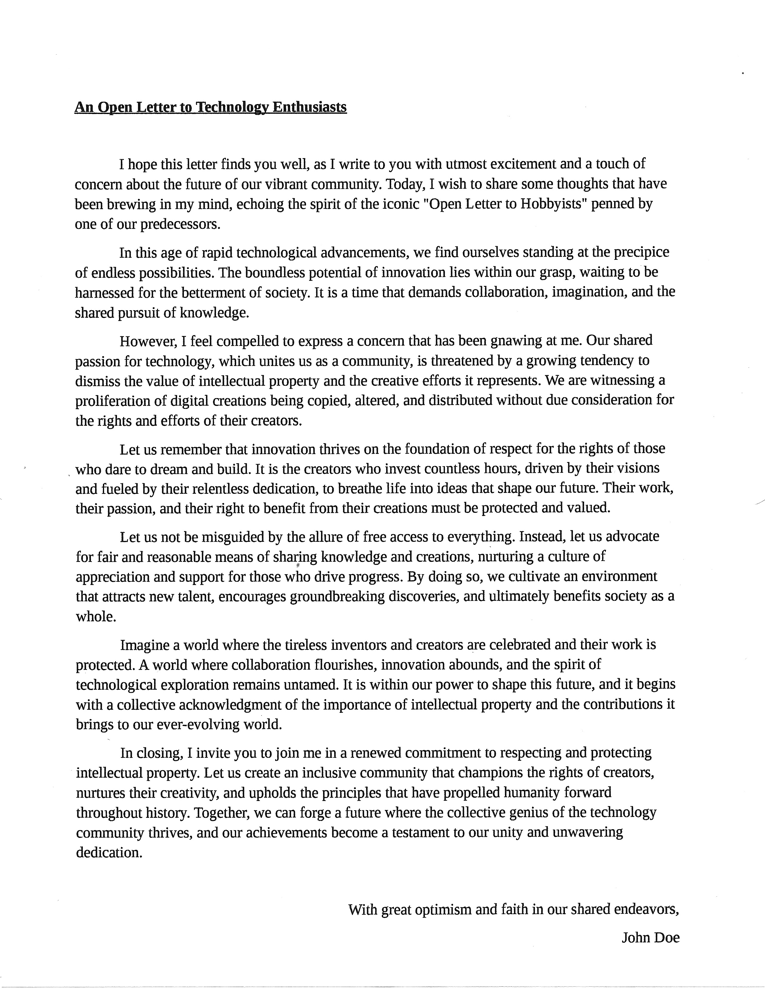

An Open Letter to Technology Enthusiasts

I hope this letter finds you well, as I write to you with utmost excitement and a touch of
concern about the future of our vibrant community. Today, I wish to share some thoughts that have
been brewing in my mind, echoing the spirit of the iconic "Open Letter to Hobbyists" penned by
one of our predecessors.

In this age of rapid technological advancements, we find ourselves standing at the precipice
of endless possibilities. The boundless potential of innovation lies within our grasp, waiting to be
harnessed for the betterment of society. It is a time that demands collaboration, imagination, and the
shared pursuit of knowledge.

However, I feel compelled to express a concern that has been gnawing at me. Our shared
passion for technology, which unites us as a community, is threatened by a growing tendency to
dismiss the value of intellectual property and the creative efforts it represents. We are witnessing a
proliferation of digital creations b

In [5]:
rotate = osd['rotate']
im_fixed = im.copy().rotate(rotate)
display(im_fixed.resize(int(0.3*s) for s in im_fixed.size))
print(pytesseract.image_to_string(im_fixed))

## Use case for Script Detection

Where does script detection come into play? Here's one potential example: what if you are creating a global OCR API? In this case you may not know the language or script of the input image. 

In this example, I have a image in the Hebrew language. I can extract text from this image with out knowing it is Hebrew in advance by utilizing the script trained data that comes with ```tessdata_fast```.

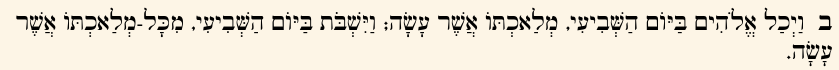

In [6]:
path = '../../../../binder-datasets/ocr/images/hebrew_text.png'
im = Image.open(path)
display(im)

In [7]:
osd = pytesseract.image_to_osd(im, output_type='dict')
print(osd)

{'page_num': 0, 'orientation': 0, 'rotate': 0, 'orientation_conf': 6.11, 'script': 'Hebrew', 'script_conf': 90.0}


In [8]:
print(pytesseract.image_to_string(im, lang='script/'+osd['script'], config='--psm 6'))

ב וכל אֲלֹהִים בַּיוֹם הַשְׁבֵיעי. מְלֵאכְתּוֹ אֲשֶׁר עֲשֶׂה; ויִשְׁבּת בַּיוֹם הַשְׁבֵיעי. מכָּל-מְלָאכְתּוֹ אֲשֶׁר
עֲשֶׂה.



This is not perfect. There are two potential issues with this. 

1. Some languages have the same script type. As an example, English, Spanish, and French all are classified as 'Latin'. 
2. The script type returned by ```image_to_osd``` is not a one-to-one mapping. As an example for Chinese Simple and Chinese Traditional the output might be 'Han'
but if you examine the ```tessdata``` scripts, you will find 'HanS', 'HanS_vert', 'HanT', and 'HanT_vert'. 

For the first issue a resolution could be to extract the text via the 'Latin' script, then use a separate Python library, such as [langdetect](https://github.com/Mimino666/langdetect),
to get the best language match. Then you would could OCR again with the detected language for more accurate results.

For the second issue you may need to use a variety of methods to make an educated guess.